# Predicting the Species in Iris Dataset

### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Importing modules

In [12]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

pd.options.display.max_rows = 150


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Loading CSV and Data Inspection

In [16]:
iris_df = pd.read_csv('/kaggle/input/iris/Iris.csv',index_col = 'Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [18]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
iris_df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Checking for null values

In [20]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### INSIGHT
- No `Null` values.
- No need of any datatype conversions.
- Every species category have equal number of data points. Thus, the dataset is not biased

## EDA
### CHECKING FOR OUTLIERS

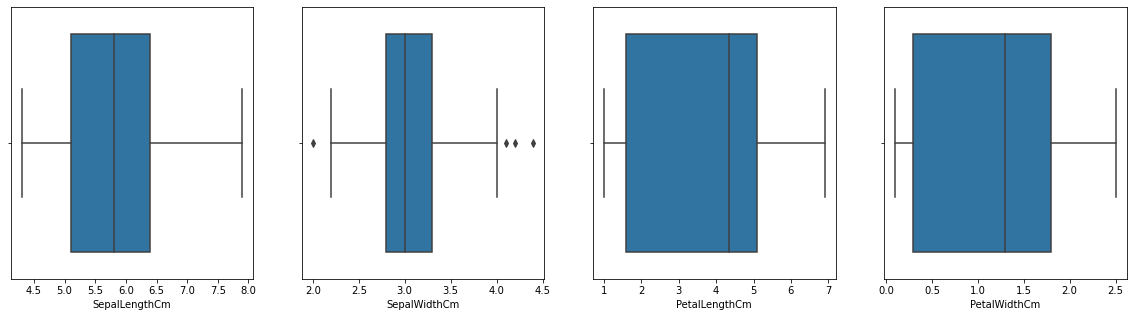

In [21]:
plt.figure(figsize=(20,5))
j = 1
for i in iris_df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.boxplot(iris_df[i])
    j+=1

### INSIGHT
- Only `SepalWidthCm` is having outliers.
- All other are not having any outliers.

### Checking the distribution

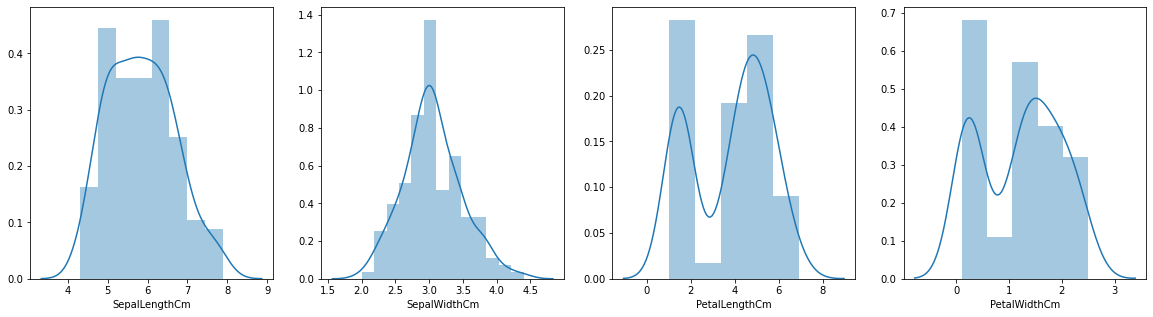

In [22]:
plt.figure(figsize=(20,5))
j = 1
for i in iris_df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.distplot(iris_df[i])
    j+=1

### INSIGHT
- `SepalLengthCm`, `SepalWidthCm` are following `Normal Distribution`.
- `PetalLengthCm`, `PetalWidthCm` are not following `Normal Distribution`. Thus, maybe much helpful when compared to other two in clustering.

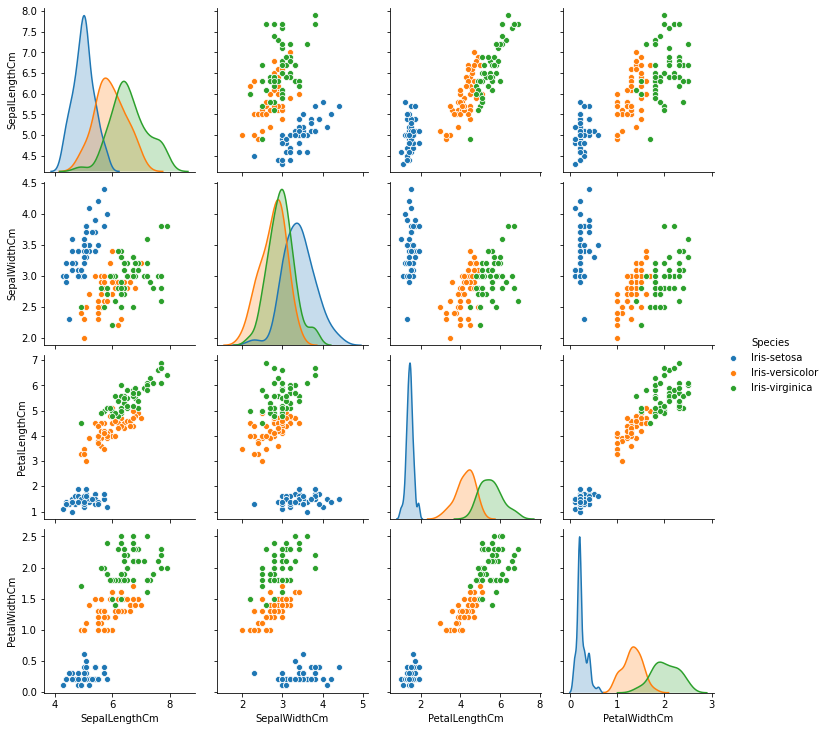

In [23]:
sns.pairplot(iris_df,hue='Species')
plt.show()

### INSIGHT
- `PetalLengthCm`, `PetalWidthCm` columns are much more segmented between species when compared to other two.
- In `scatter plot` between `SepalWidthCm` and `SepalLenthCm`, we cannot draw a border line between Species `versicolor` and `virginica`
- Remaining plots look promising.

## Data Preprocessing
### `Species` is the target variable here. So, y = `Species` and remaining features are X

In [24]:
X = iris_df.drop('Species',axis=1)
y = iris_df.Species
X.shape, y.shape

((150, 4), (150,))

### Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=100)

### Feature Scaling  
- Using `StandardScaler` to scale the training data 

In [28]:
from sklearn.preprocessing import StandardScaler    
scaler= StandardScaler()  
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test)

## MODEL BUILDING
- Using `Decision Tree Classifier` 
- Using `GridSearchCV` to get best parameters which will not make model overfit

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 3, 5, 7, 9]}
gs = GridSearchCV(DecisionTreeClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.9s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 3, 5, 7, 9]},
             verbose=1)

In [30]:
print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

Score: 0.9818181818181818 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}


In [31]:
best_classifier = gs.best_estimator_
best_classifier

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = best_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]])

## MODEL EVALUATION
### Calculating `Accuracy` on the test data

In [33]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


## Visualizing the `Decision Tree Model`

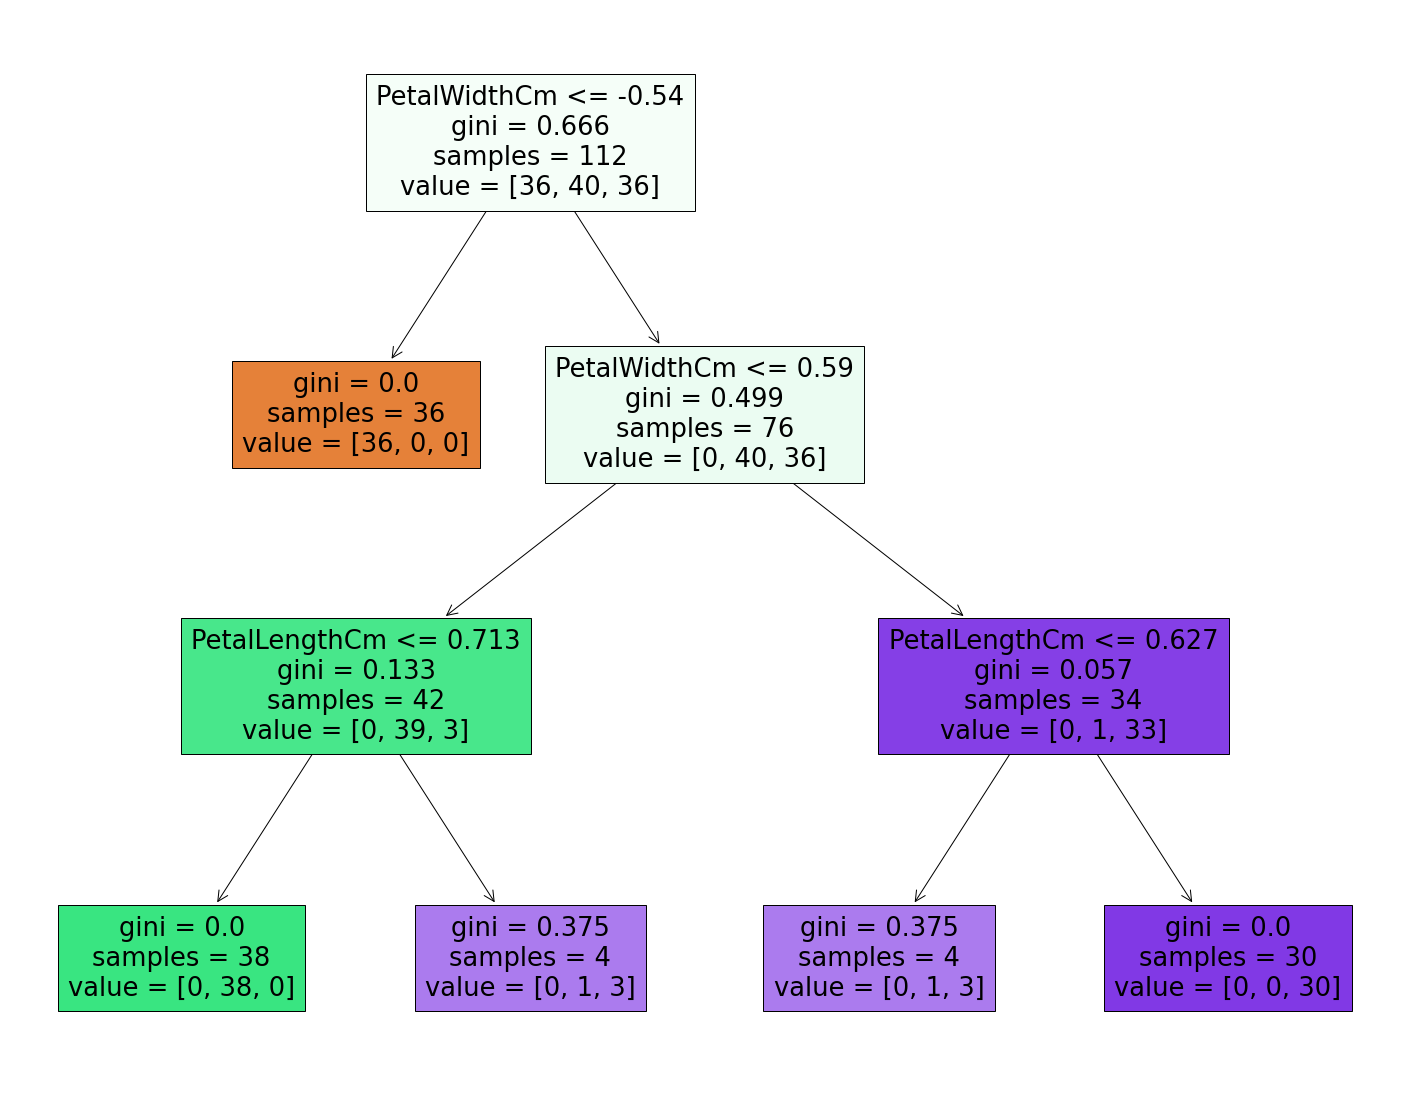

In [34]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(best_classifier, feature_names=iris_df.columns, filled=True)
plt.show()

## CONCLUSION

<b> `Accuracy` of the `decision tree model` with `max_depth` at 5 and `min_samples_leaf` is 3 is `94.7%`</b>